Giuliana Prado Peixoto

Projeto 1: Rede MLP



Para o projeto, estarei usando um dataset de câncer de mama chamado Breast Cancer Wisconsin, obtido do repositório UCI. Link para o dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

O dataset possui 569 instâncias, 30 features e não possui dados faltantes.

Irei utilizar o algoritmo básico SGD para treinar o modelo que classifica os casos como benigno ou maligno, e serão avaliadas 5 arquiteturas distintas. As funções de custo e de ativação serão as mesmas para todas as simulações.

Para todas as simulações, vou utilizar a binary_entropy como loss (função de custo), e como função de ativação teremos relu nas camadas ocultas e sigmoide na saída.

A proposta é avaliar diferentes organizações de redes neurais, variando o número de camadas ocultas e quantidade de neurônios, e comparar a performance com e sem o uso do termo de momentum.

In [1]:
# Fazendo o pip install
!pip install ucimlrepo

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Obtendo os dados
breast_cancer = fetch_ucirepo(id=17)

# Dividindo os dados em features e target

X = breast_cancer.data.features
y = breast_cancer.data.targets

In [4]:
# Observando os dados

df = pd.concat([X, y], axis=1)
df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [5]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

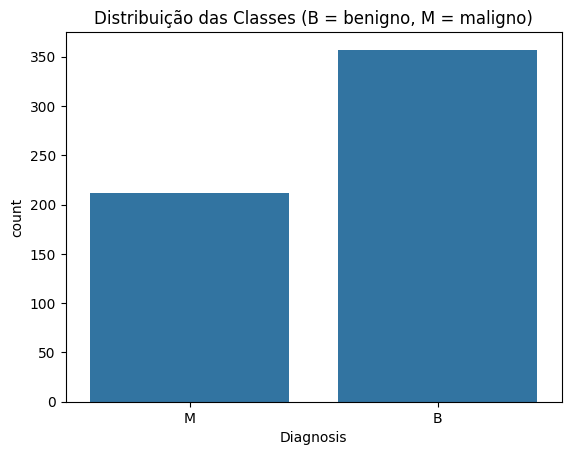

In [6]:
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribuição das Classes (B = benigno, M = maligno)')
plt.show()

Aqui, percebemos que os dados estão desbalanceados, ou seja, temos mais targets do tipo B do que M.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [8]:
y.value_counts()


,count
Diagnosis,
B,357
M,212


Será necessário converter o target 'Diagnosis' para numeros, pois está sendo representado por M ou B, que não funciona para o treinamento.

In [9]:
# Fazendo a conversão
y = y.replace({'B': 0, 'M': 1})


/tmp/ipython-input-9-485241213.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B': 0, 'M': 1})


In [10]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Os valores de X são bem discrepantes, então será preciso normalizar os dados.

In [11]:
# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Com os dados normalizados, podemos dividir em dados de treino, validação e teste.

In [12]:
# Dividir em treino+validação (80%) e teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Agora, com os 80% do treino, vou redividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=42, stratify=y_train_val)

In [13]:
print(f'Treino: {X_train.shape[0]} amostras')
print(f'Validação: {X_val.shape[0]} amostras')
print(f'Teste: {X_test.shape[0]} amostras')

Treino: 364 amostras
Validação: 91 amostras
Teste: 114 amostras


Agora, utilizando o Keras, estarei montando as redes MLP sem momentum.

In [14]:
!pip install tensorflow


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# MLP Linear, 30 entradas e 1 saída

In [16]:

def mlp_linear(momentum):
  # Parâmetros

  input_dim = X_train.shape[1]  # 30 features
  learning_rate = 0.01
  epochs = 100
  batch_size = 32

  # Modelo linear

  model = Sequential([
      InputLayer(input_shape=(input_dim,)),
      Dense(1, activation='sigmoid')  # 1 neuronio, valor entre 0 e 1
  ])

  # Momentum = 0
  optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

  # Parar cedo se não melhorar na validação
  early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  # Treinando
  history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=epochs,
      batch_size=batch_size,
      callbacks=[early_stop],
      verbose=2
  )
  return model, history

In [17]:
# Sem momentum
model_linear_no_momentum, history_linear_no_momentum = mlp_linear(0.0)

# Com momentum
model_linear_momentum, history_linear_momentum = mlp_linear(0.9)


Epoch 1/100
12/12 - 2s - 136ms/step - accuracy: 0.0934 - loss: 1.9292 - val_accuracy: 0.1648 - val_loss: 1.5376
Epoch 2/100
12/12 - 1s - 75ms/step - accuracy: 0.1923 - loss: 1.2866 - val_accuracy: 0.2967 - val_loss: 1.0331
Epoch 3/100
12/12 - 0s - 22ms/step - accuracy: 0.3984 - loss: 0.8841 - val_accuracy: 0.5495 - val_loss: 0.7465
Epoch 4/100
12/12 - 0s - 40ms/step - accuracy: 0.6181 - loss: 0.6681 - val_accuracy: 0.6813 - val_loss: 0.5843
Epoch 5/100
12/12 - 0s - 38ms/step - accuracy: 0.7582 - loss: 0.5458 - val_accuracy: 0.7692 - val_loss: 0.4882
Epoch 6/100
12/12 - 0s - 28ms/step - accuracy: 0.8104 - loss: 0.4709 - val_accuracy: 0.8352 - val_loss: 0.4237
Epoch 7/100
12/12 - 0s - 23ms/step - accuracy: 0.8352 - loss: 0.4184 - val_accuracy: 0.9231 - val_loss: 0.3762
Epoch 8/100
12/12 - 0s - 38ms/step - accuracy: 0.8544 - loss: 0.3793 - val_accuracy: 0.9231 - val_loss: 0.3420
Epoch 9/100
12/12 - 1s - 47ms/step - accuracy: 0.8654 - loss: 0.3496 - val_accuracy: 0.9231 - val_loss: 0.3149


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 87ms/step - accuracy: 0.6786 - loss: 0.6110 - val_accuracy: 0.9121 - val_loss: 0.2835
Epoch 2/100
12/12 - 0s - 13ms/step - accuracy: 0.9176 - loss: 0.2424 - val_accuracy: 0.9451 - val_loss: 0.1811
Epoch 3/100
12/12 - 0s - 23ms/step - accuracy: 0.9423 - loss: 0.1741 - val_accuracy: 0.9451 - val_loss: 0.1555
Epoch 4/100
12/12 - 0s - 11ms/step - accuracy: 0.9670 - loss: 0.1262 - val_accuracy: 0.9451 - val_loss: 0.1451
Epoch 5/100
12/12 - 0s - 10ms/step - accuracy: 0.9780 - loss: 0.1109 - val_accuracy: 0.9451 - val_loss: 0.1391
Epoch 6/100
12/12 - 0s - 11ms/step - accuracy: 0.9780 - loss: 0.1035 - val_accuracy: 0.9451 - val_loss: 0.1349
Epoch 7/100
12/12 - 0s - 31ms/step - accuracy: 0.9780 - loss: 0.0988 - val_accuracy: 0.9560 - val_loss: 0.1314
Epoch 8/100
12/12 - 0s - 35ms/step - accuracy: 0.9808 - loss: 0.0948 - val_accuracy: 0.9560 - val_loss: 0.1291
Epoch 9/100
12/12 - 1s - 58ms/step - accuracy: 0.9808 - loss: 0.0913 - val_accuracy: 0.9560 - val_loss: 0.1269
Epoch 10/100


In [18]:
def avaliar_modelo(modelo, nome, X_val, y_val, X_test, y_test):
    val_loss, val_acc = modelo.evaluate(X_val, y_val, verbose=0)
    test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=0)

    print(f"=== {nome} ===")
    print(f"Validação - Loss: {val_loss:.4f}, Acurácia: {val_acc:.4f}")
    print(f"Teste     - Loss: {test_loss:.4f}, Acurácia: {test_acc:.4f}")
    print()


In [ ]:
def plot_comparison(history1, history2, label1='Sem momentum', label2='Com momentum'):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # LOSS
    axs[0].plot(history1.history['loss'], label=f'Treino ({label1})')
    axs[0].plot(history1.history['val_loss'], label=f'Validação ({label1})')
    axs[0].plot(history2.history['loss'], label=f'Treino ({label2})')
    axs[0].plot(history2.history['val_loss'], label=f'Validação ({label2})')
    axs[0].set_title('Loss durante o treinamento')
    axs[0].set_xlabel('Épocas')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # ACCURACY
    axs[1].plot(history1.history['accuracy'], label=f'Treino ({label1})')
    axs[1].plot(history1.history['val_accuracy'], label=f'Validação ({label1})')
    axs[1].plot(history2.history['accuracy'], label=f'Treino ({label2})')
    axs[1].plot(history2.history['val_accuracy'], label=f'Validação ({label2})')
    axs[1].set_title('Acurácia durante o treinamento')
    axs[1].set_xlabel('Épocas')
    axs[1].set_ylabel('Acurácia')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


In [23]:
avaliar_modelo(model_linear_no_momentum, "Modelo Linear sem Momentum", X_val, y_val, X_test, y_test)
avaliar_modelo(model_linear_momentum, "Modelo Linear com Momentum", X_val, y_val, X_test, y_test)

=== Modelo Linear sem Momentum ===
Validação - Loss: 0.1085, Acurácia: 0.9780
Teste     - Loss: 0.0964, Acurácia: 0.9825

=== Modelo Linear com Momentum ===
Validação - Loss: 0.0935, Acurácia: 0.9560
Teste     - Loss: 0.0701, Acurácia: 0.9737



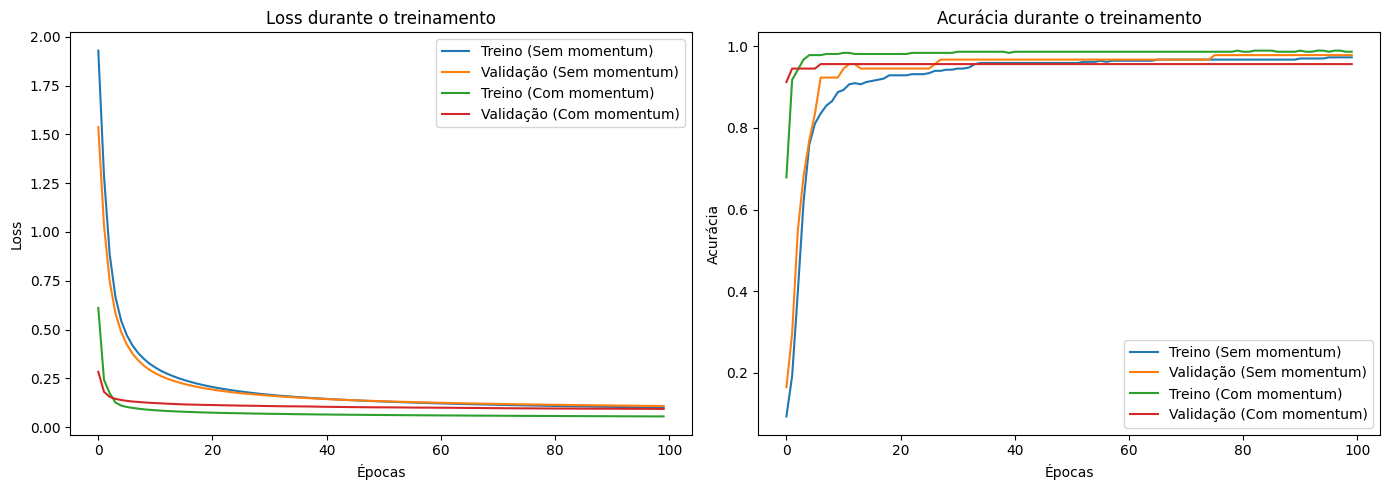

In [24]:
plot_comparison(history_linear_no_momentum, history_linear_momentum)

CONCLUSÃO:
Na validação, o momentum reduziu a loss, mas a acurácia se manteve.
No teste, o modelo de momentum foi melhor, com menor loss e maior acurácia. Diante disso, concluímos que o momentum generalizou melhor para novos dados.

# Rede com 1 camada oculta com 5 neurônios

In [25]:
def train_mlp_1hidden(momentum_value):
      # Parâmetros

    input_dim = X_train.shape[1]  # 30 features
    learning_rate = 0.01
    epochs = 100
    batch_size = 32

    model = Sequential([
        InputLayer(input_shape=(input_dim,)),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum_value)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=2
    )
    return model, history


In [26]:
# Sem momentum
model_1hidden_no_momentum, history_1hidden_no_momentum = train_mlp_1hidden(momentum_value=0.0)

# Com momentum
model_1hidden_momentum, history_1hidden_momentum = train_mlp_1hidden(momentum_value=0.9)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 90ms/step - accuracy: 0.5769 - loss: 0.7012 - val_accuracy: 0.6374 - val_loss: 0.5882
Epoch 2/100
12/12 - 0s - 10ms/step - accuracy: 0.6401 - loss: 0.6620 - val_accuracy: 0.6593 - val_loss: 0.5641
Epoch 3/100
12/12 - 0s - 10ms/step - accuracy: 0.6813 - loss: 0.6288 - val_accuracy: 0.6813 - val_loss: 0.5420
Epoch 4/100
12/12 - 0s - 12ms/step - accuracy: 0.7198 - loss: 0.5963 - val_accuracy: 0.7363 - val_loss: 0.5229
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.7527 - loss: 0.5691 - val_accuracy: 0.8022 - val_loss: 0.5063
Epoch 6/100
12/12 - 0s - 11ms/step - accuracy: 0.8159 - loss: 0.5458 - val_accuracy: 0.8022 - val_loss: 0.4916
Epoch 7/100
12/12 - 0s - 12ms/step - accuracy: 0.8434 - loss: 0.5254 - val_accuracy: 0.8352 - val_loss: 0.4780
Epoch 8/100
12/12 - 0s - 11ms/step - accuracy: 0.8681 - loss: 0.5059 - val_accuracy: 0.8681 - val_loss: 0.4653
Epoch 9/100
12/12 - 0s - 12ms/step - accuracy: 0.8846 - loss: 0.4882 - val_accuracy: 0.8901 - val_loss: 0.4534
Epoch 10/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 95ms/step - accuracy: 0.7308 - loss: 0.6296 - val_accuracy: 0.8901 - val_loss: 0.5243
Epoch 2/100
12/12 - 0s - 31ms/step - accuracy: 0.9258 - loss: 0.4332 - val_accuracy: 0.9560 - val_loss: 0.3357
Epoch 3/100
12/12 - 0s - 13ms/step - accuracy: 0.9505 - loss: 0.2782 - val_accuracy: 0.9451 - val_loss: 0.2189
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.9533 - loss: 0.1903 - val_accuracy: 0.9560 - val_loss: 0.1655
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.9533 - loss: 0.1488 - val_accuracy: 0.9560 - val_loss: 0.1416
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.9615 - loss: 0.1275 - val_accuracy: 0.9560 - val_loss: 0.1283
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.9615 - loss: 0.1145 - val_accuracy: 0.9560 - val_loss: 0.1189
Epoch 8/100
12/12 - 0s - 10ms/step - accuracy: 0.9615 - loss: 0.1056 - val_accuracy: 0.9670 - val_loss: 0.1130
Epoch 9/100
12/12 - 0s - 25ms/step - accuracy: 0.9615 - loss: 0.0986 - val_accuracy: 0.9670 - val_loss: 0.1087
Epoch 10/100


In [27]:
avaliar_modelo(model_1hidden_no_momentum, "Modelo 1 camada oculta sem Momentum", X_val, y_val, X_test, y_test)
avaliar_modelo(model_1hidden_momentum, "Modelo 1 camada oculta com Momentum", X_val, y_val, X_test, y_test)

=== Modelo 1 camada oculta sem Momentum ===
Validação - Loss: 0.1723, Acurácia: 0.9780
Teste     - Loss: 0.1740, Acurácia: 0.9825

=== Modelo 1 camada oculta com Momentum ===
Validação - Loss: 0.0870, Acurácia: 0.9670
Teste     - Loss: 0.0703, Acurácia: 0.9825



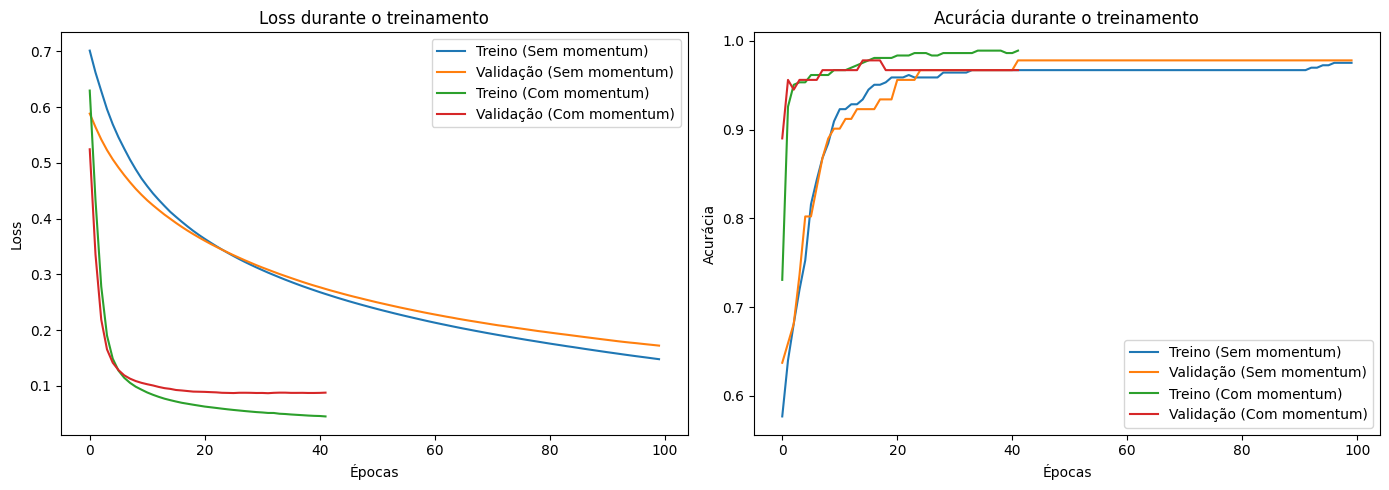

In [28]:
plot_comparison(history_1hidden_no_momentum, history_1hidden_momentum)


CONCLUSÃO: Na validação, tanto a loss quanto a acurácia diminuiram com o momentum. No teste, a loss diminuiu com o momentum, mas a acurácia foi igual. Diante disso, concluímos que as previsões com momentum foram mais estáveis. Pelo gráficos, percebemos que a loss diminuiu mais rapidamente e a acurácia aumentou com momentum e o treinamento pôde ser interrompido mais cedo.

# Rede com 1 camada oculta com 10 neurônios

In [32]:
def train_mlp_1hidden_10(momentum_value):

      # Parâmetros

    input_dim = X_train.shape[1]  # 30 features
    learning_rate = 0.01
    epochs = 100
    batch_size = 32

    model = Sequential([
        InputLayer(input_shape=(input_dim,)),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum_value)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=2
    )
    return model, history


In [34]:
model_1hidden_10_no_momentum, history_1hidden_10_no_momentum = train_mlp_1hidden_10(momentum_value=0.0)
model_1hidden_10_momentum, history_1hidden_10_momentum = train_mlp_1hidden_10(momentum_value=0.9)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
12/12 - 1s - 112ms/step - accuracy: 0.7418 - loss: 0.5235 - val_accuracy: 0.8242 - val_loss: 0.4812
Epoch 2/100
12/12 - 0s - 29ms/step - accuracy: 0.8379 - loss: 0.4394 - val_accuracy: 0.8462 - val_loss: 0.4199
Epoch 3/100
12/12 - 0s - 26ms/step - accuracy: 0.8681 - loss: 0.3887 - val_accuracy: 0.9011 - val_loss: 0.3776
Epoch 4/100
12/12 - 0s - 18ms/step - accuracy: 0.8956 - loss: 0.3514 - val_accuracy: 0.9231 - val_loss: 0.3473
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.9203 - loss: 0.3237 - val_accuracy: 0.9341 - val_loss: 0.3239
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.9203 - loss: 0.3019 - val_accuracy: 0.9341 - val_loss: 0.3052
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.9258 - loss: 0.2840 - val_accuracy: 0.9341 - val_loss: 0.2896
Epoch 8/100
12/12 - 0s - 12ms/step - accuracy: 0.9313 - loss: 0.2685 - val_accuracy: 0.9341 - val_loss: 0.2762
Epoch 9/100
12/12 - 0s - 10ms/step - accuracy: 0.9313 - loss: 0.2550 - val_accuracy: 0.9451 - val_loss: 0.2647


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 95ms/step - accuracy: 0.6511 - loss: 0.6243 - val_accuracy: 0.8901 - val_loss: 0.3694
Epoch 2/100
12/12 - 0s - 22ms/step - accuracy: 0.9176 - loss: 0.2783 - val_accuracy: 0.9560 - val_loss: 0.2134
Epoch 3/100
12/12 - 0s - 12ms/step - accuracy: 0.9341 - loss: 0.1860 - val_accuracy: 0.9560 - val_loss: 0.1661
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.9478 - loss: 0.1520 - val_accuracy: 0.9560 - val_loss: 0.1444
Epoch 5/100
12/12 - 0s - 23ms/step - accuracy: 0.9588 - loss: 0.1317 - val_accuracy: 0.9560 - val_loss: 0.1319
Epoch 6/100
12/12 - 0s - 11ms/step - accuracy: 0.9670 - loss: 0.1187 - val_accuracy: 0.9560 - val_loss: 0.1225
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.9725 - loss: 0.1085 - val_accuracy: 0.9560 - val_loss: 0.1145
Epoch 8/100
12/12 - 0s - 11ms/step - accuracy: 0.9780 - loss: 0.0989 - val_accuracy: 0.9560 - val_loss: 0.1085
Epoch 9/100
12/12 - 0s - 11ms/step - accuracy: 0.9808 - loss: 0.0923 - val_accuracy: 0.9670 - val_loss: 0.1033
Epoch 10/100


=== 1 Camada Oculta (10 neurônios) - Sem Momentum ===
Validação - Loss: 0.1048, Acurácia: 0.9670
Teste     - Loss: 0.0851, Acurácia: 0.9737

=== 1 Camada Oculta (10 neurônios) - Com Momentum ===
Validação - Loss: 0.0848, Acurácia: 0.9780
Teste     - Loss: 0.0782, Acurácia: 0.9737



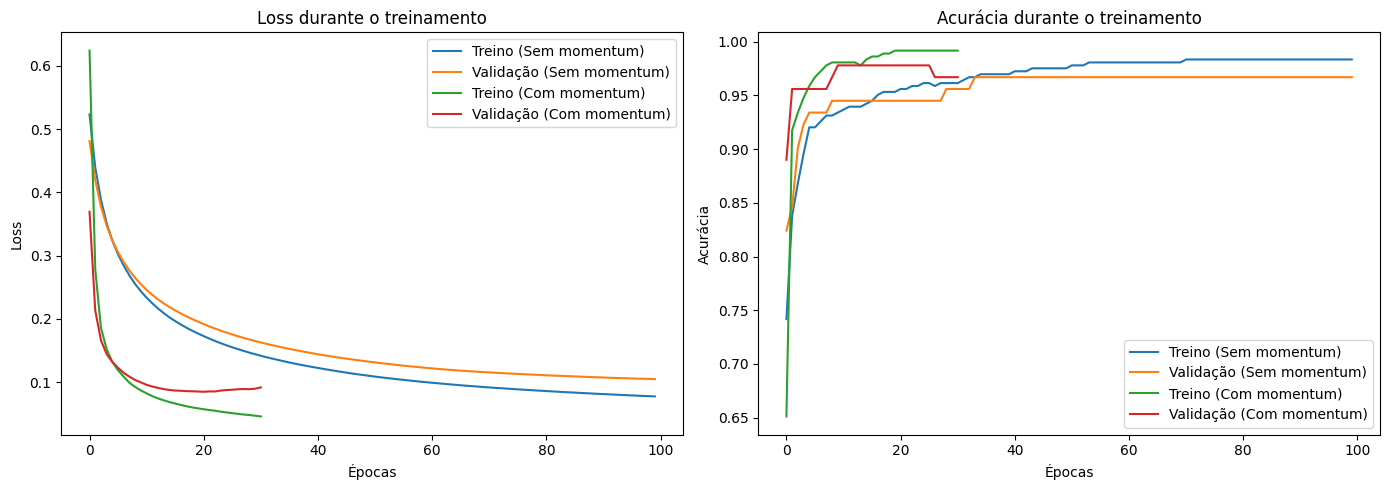

In [37]:
avaliar_modelo(model_1hidden_10_no_momentum, "1 Camada Oculta (10 neurônios) - Sem Momentum", X_val, y_val, X_test, y_test)
avaliar_modelo(model_1hidden_10_momentum, "1 Camada Oculta (10 neurônios) - Com Momentum", X_val, y_val, X_test, y_test)

plot_comparison(history_1hidden_10_no_momentum, history_1hidden_10_momentum)


CONCLUISÃO: O uso de momentum melhorou a loss, tanto na validação como no teste, e aumentou a acurácia na validação. No grafico, vemos que com o momentum o treinamento foi interrompido mais cedo, com menos de 40 epocas, enquando o treino sem momentum fez as 100 epocas totais.

# Rede com 2 camadas ocultas, com 10 e 5 neurônios

In [29]:
def train_mlp_2hidden(momentum_value):
      # Parâmetros

    input_dim = X_train.shape[1]  # 30 features
    learning_rate = 0.01
    epochs = 100
    batch_size = 32



    model = Sequential([
        InputLayer(input_shape=(input_dim,)),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum_value)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=2
    )
    return model, history


In [30]:
# Sem momentum
model_2hidden_no_momentum, history_2hidden_no_momentum = train_mlp_2hidden(momentum_value=0.0)

# Com momentum
model_2hidden_momentum, history_2hidden_momentum = train_mlp_2hidden(momentum_value=0.9)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 72ms/step - accuracy: 0.3269 - loss: 0.7829 - val_accuracy: 0.3297 - val_loss: 0.7922
Epoch 2/100
12/12 - 0s - 10ms/step - accuracy: 0.3791 - loss: 0.7367 - val_accuracy: 0.3626 - val_loss: 0.7548
Epoch 3/100
12/12 - 0s - 11ms/step - accuracy: 0.4368 - loss: 0.7025 - val_accuracy: 0.4396 - val_loss: 0.7248
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.5027 - loss: 0.6738 - val_accuracy: 0.4835 - val_loss: 0.6998
Epoch 5/100
12/12 - 0s - 12ms/step - accuracy: 0.5797 - loss: 0.6477 - val_accuracy: 0.5824 - val_loss: 0.6758
Epoch 6/100
12/12 - 0s - 24ms/step - accuracy: 0.6648 - loss: 0.6221 - val_accuracy: 0.6374 - val_loss: 0.6527
Epoch 7/100
12/12 - 0s - 10ms/step - accuracy: 0.7308 - loss: 0.5978 - val_accuracy: 0.7253 - val_loss: 0.6297
Epoch 8/100
12/12 - 0s - 10ms/step - accuracy: 0.7775 - loss: 0.5744 - val_accuracy: 0.7473 - val_loss: 0.6054
Epoch 9/100
12/12 - 0s - 12ms/step - accuracy: 0.8214 - loss: 0.5517 - val_accuracy: 0.7802 - val_loss: 0.5831
Epoch 10/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 2s - 157ms/step - accuracy: 0.7610 - loss: 0.5494 - val_accuracy: 0.8571 - val_loss: 0.5164
Epoch 2/100
12/12 - 1s - 64ms/step - accuracy: 0.8544 - loss: 0.4223 - val_accuracy: 0.9011 - val_loss: 0.3757
Epoch 3/100
12/12 - 0s - 19ms/step - accuracy: 0.9011 - loss: 0.2940 - val_accuracy: 0.9341 - val_loss: 0.2519
Epoch 4/100
12/12 - 0s - 14ms/step - accuracy: 0.9258 - loss: 0.2133 - val_accuracy: 0.9451 - val_loss: 0.1788
Epoch 5/100
12/12 - 0s - 25ms/step - accuracy: 0.9368 - loss: 0.1687 - val_accuracy: 0.9451 - val_loss: 0.1480
Epoch 6/100
12/12 - 0s - 11ms/step - accuracy: 0.9451 - loss: 0.1416 - val_accuracy: 0.9560 - val_loss: 0.1276
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.9588 - loss: 0.1197 - val_accuracy: 0.9560 - val_loss: 0.1149
Epoch 8/100
12/12 - 0s - 11ms/step - accuracy: 0.9698 - loss: 0.1039 - val_accuracy: 0.9560 - val_loss: 0.1066
Epoch 9/100
12/12 - 0s - 10ms/step - accuracy: 0.9725 - loss: 0.0921 - val_accuracy: 0.9560 - val_loss: 0.1004
Epoch 10/100

=== 2 Camadas Ocultas - Sem Momentum ===
Validação - Loss: 0.0887, Acurácia: 0.9670
Teste     - Loss: 0.0756, Acurácia: 0.9825

=== 2 Camadas Ocultas - Com Momentum ===
Validação - Loss: 0.0843, Acurácia: 0.9560
Teste     - Loss: 0.0805, Acurácia: 0.9825



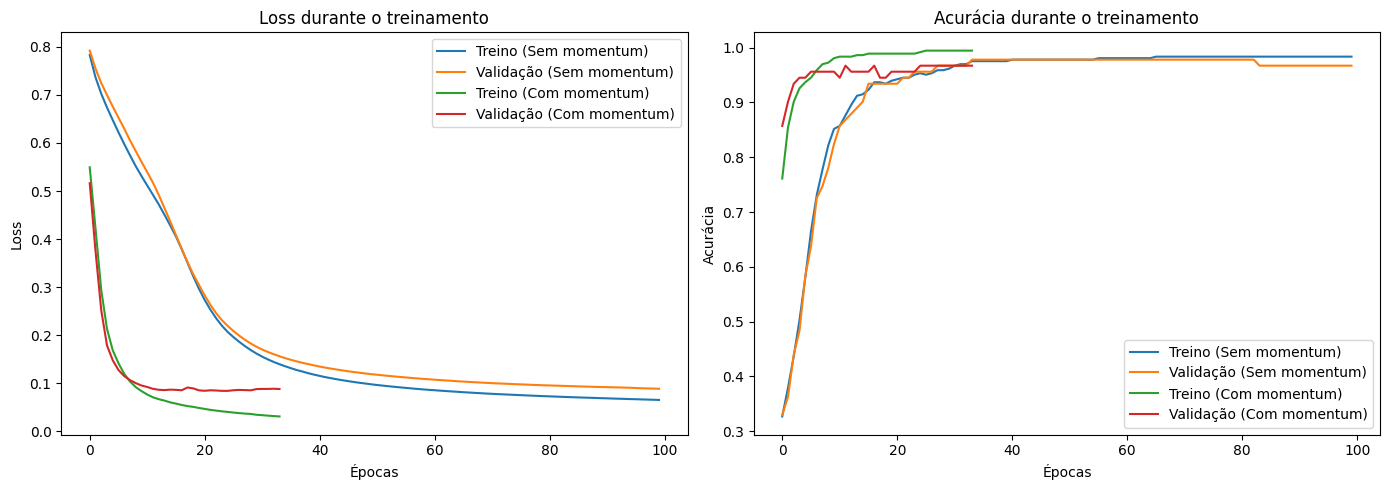

In [31]:
# Avaliação
avaliar_modelo(model_2hidden_no_momentum, "2 Camadas Ocultas - Sem Momentum", X_val, y_val, X_test, y_test)
avaliar_modelo(model_2hidden_momentum, "2 Camadas Ocultas - Com Momentum", X_val, y_val, X_test, y_test)

# Gráfico
plot_comparison(history_2hidden_no_momentum, history_2hidden_momentum)


CONCLUSÃO: Não houveram muitas diferenças na loss, e a acurácia foi mais baixa com o momentum, apesar de ter terminado o treino mais rápido. Isso indica que, em redes com mais camadas, o uso de momentum não trouxe grandes vantagens adicionais.

# Rede com 2 camadas ocultas, com 20 e 10 neurônios

In [33]:
def train_mlp_2hidden_20_10(momentum_value):

      # Parâmetros

    input_dim = X_train.shape[1]  # 30 features
    learning_rate = 0.01
    epochs = 100
    batch_size = 32

    model = Sequential([
        InputLayer(input_shape=(input_dim,)),
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum_value)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=2
    )
    return model, history


In [35]:
model_2hidden_20_10_no_momentum, history_2hidden_20_10_no_momentum = train_mlp_2hidden_20_10(momentum_value=0.0)
model_2hidden_20_10_momentum, history_2hidden_20_10_momentum = train_mlp_2hidden_20_10(momentum_value=0.9)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 1s - 86ms/step - accuracy: 0.6264 - loss: 0.6726 - val_accuracy: 0.7582 - val_loss: 0.5957
Epoch 2/100
12/12 - 0s - 38ms/step - accuracy: 0.7060 - loss: 0.5939 - val_accuracy: 0.7802 - val_loss: 0.5371
Epoch 3/100
12/12 - 0s - 11ms/step - accuracy: 0.7500 - loss: 0.5358 - val_accuracy: 0.8242 - val_loss: 0.4914
Epoch 4/100
12/12 - 0s - 11ms/step - accuracy: 0.7940 - loss: 0.4895 - val_accuracy: 0.8571 - val_loss: 0.4532
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.8269 - loss: 0.4516 - val_accuracy: 0.8571 - val_loss: 0.4220
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.8462 - loss: 0.4196 - val_accuracy: 0.8901 - val_loss: 0.3951
Epoch 7/100
12/12 - 0s - 10ms/step - accuracy: 0.8571 - loss: 0.3909 - val_accuracy: 0.9011 - val_loss: 0.3716
Epoch 8/100
12/12 - 0s - 13ms/step - accuracy: 0.8736 - loss: 0.3652 - val_accuracy: 0.9121 - val_loss: 0.3501
Epoch 9/100
12/12 - 0s - 21ms/step - accuracy: 0.8819 - loss: 0.3429 - val_accuracy: 0.9121 - val_loss: 0.3322
Epoch 10/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 - 2s - 154ms/step - accuracy: 0.3956 - loss: 0.7748 - val_accuracy: 0.7473 - val_loss: 0.6133
Epoch 2/100
12/12 - 0s - 17ms/step - accuracy: 0.8819 - loss: 0.4890 - val_accuracy: 0.9231 - val_loss: 0.3867
Epoch 3/100
12/12 - 0s - 17ms/step - accuracy: 0.9313 - loss: 0.2933 - val_accuracy: 0.9451 - val_loss: 0.2322
Epoch 4/100
12/12 - 0s - 38ms/step - accuracy: 0.9396 - loss: 0.1869 - val_accuracy: 0.9670 - val_loss: 0.1643
Epoch 5/100
12/12 - 0s - 40ms/step - accuracy: 0.9423 - loss: 0.1388 - val_accuracy: 0.9670 - val_loss: 0.1371
Epoch 6/100
12/12 - 0s - 30ms/step - accuracy: 0.9533 - loss: 0.1146 - val_accuracy: 0.9670 - val_loss: 0.1223
Epoch 7/100
12/12 - 0s - 10ms/step - accuracy: 0.9643 - loss: 0.1006 - val_accuracy: 0.9780 - val_loss: 0.1129
Epoch 8/100
12/12 - 0s - 10ms/step - accuracy: 0.9725 - loss: 0.0928 - val_accuracy: 0.9670 - val_loss: 0.1091
Epoch 9/100
12/12 - 0s - 10ms/step - accuracy: 0.9780 - loss: 0.0848 - val_accuracy: 0.9560 - val_loss: 0.1053
Epoch 10/100

=== 2 Camadas Ocultas (20-10 neurônios) - Sem Momentum ===
Validação - Loss: 0.1248, Acurácia: 0.9451
Teste     - Loss: 0.0993, Acurácia: 0.9825

=== 2 Camadas Ocultas (20-10 neurônios) - Com Momentum ===
Validação - Loss: 0.0941, Acurácia: 0.9560
Teste     - Loss: 0.0809, Acurácia: 0.9825



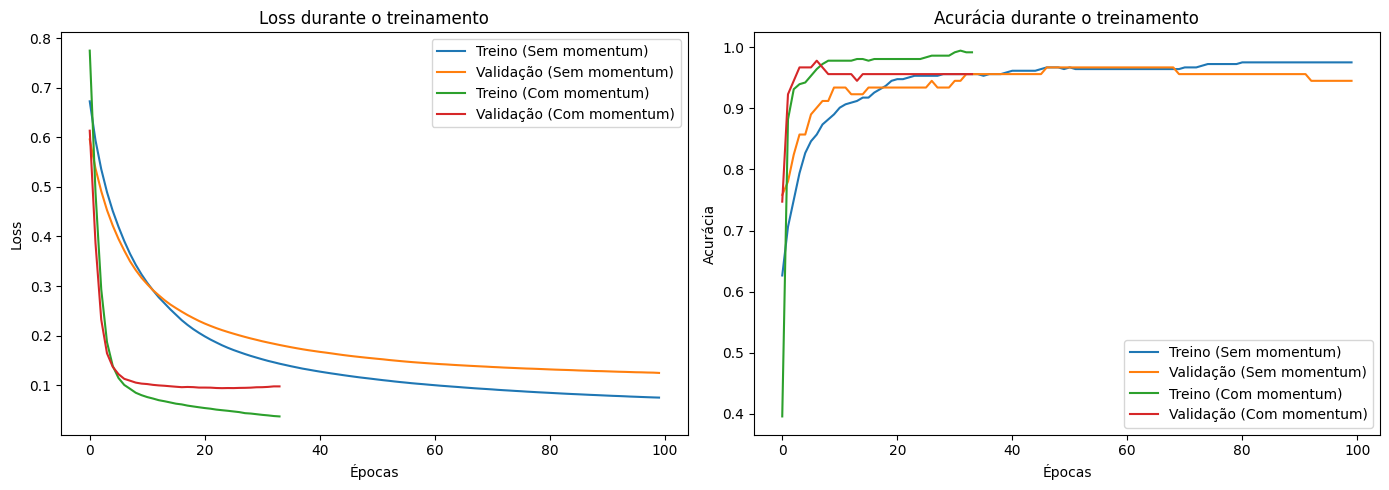

In [36]:
avaliar_modelo(model_2hidden_20_10_no_momentum, "2 Camadas Ocultas (20-10 neurônios) - Sem Momentum", X_val, y_val, X_test, y_test)
avaliar_modelo(model_2hidden_20_10_momentum, "2 Camadas Ocultas (20-10 neurônios) - Com Momentum", X_val, y_val, X_test, y_test)

plot_comparison(history_2hidden_20_10_no_momentum, history_2hidden_20_10_momentum)


CONCLUSÃO: O uso do momentum reduziu bem a loss e aumentou a acurácia tanto no treino como no teste. O treinamento também pôde ser interrompido mais cedo.

# Conclusão Final

No projeto, foram desenvolvidas 5 modelos de redes MLP com o algoritmo SGD para classificar um conjunto de dados de câncer de mama. As funções de ativação utilizada para as camadas ocultas foi a relu, e para a saída foi a sigmoide. A função de custo utilizada foi a binary crossentropy. Cada modelo foi testado com e sem o uso do termo de momentum.

Foi possível concluir que o momentum teve um impacto positivo na redução da função de perda (loss) e a acurácia se manteve estável no geral, e alta em todos os casos. Isso indica que o modelo estava convergindo de maneira mais eficiente. Modelos mais complexos de duas camadas não tiveram ganhos significativos adicionais com relação aos outros, e nem foram tão impactados pelo momentum, chegando até a ter perda de desempenho na acurácia. Ou seja, redes mais complexas não são necessáriamente melhores.

